In [3]:
Dataset_url = "https://www.kaggle.com/competitions/playground-series-s4e6/overviewv"

In [4]:
# Upload Kaggle json file
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c playground-series-s4e6

 65% 2.00M/3.07M [00:00<00:00, 2.89MB/s]
100% 3.07M/3.07M [00:00<00:00, 3.57MB/s]


In [6]:
!unzip -q playground-series-s4e6.zip

In [7]:
import pandas as pd
from fastai.tabular.all import *

In [8]:
df = pd.read_csv('/content/train.csv')

In [9]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [10]:
# check if any null values
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [11]:
# check number of Unique output values
df['Target'].nunique()

3

In [12]:
# check type of data
df.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [13]:
# Assume 'target' is the name of your target variable
target = 'Target'

# Get the categorical feature names
cat_names = [col for col in df.columns if col != target and df[col].dtype == 'object']

# Get the continuous feature names
cont_names = [col for col in df.columns if col != target and df[col].dtype in ['int64', 'float64']]

In [14]:
cat_names

[]

In [15]:
cont_names

['id',
 'Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflat

In [16]:
cont_names.remove("id")
cont_names.remove("Course")

In [17]:
cont_names

['Marital status',
 'Application mode',
 'Application order',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [18]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [19]:
to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = 'Course',
                   cont_names = cont_names,
                   y_names=target,
                   splits=splits)

In [20]:
dls = to.dataloaders(bs=64)

In [21]:
dls.show_batch()

,Course,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,9670,1.0,1.0,1.0,1.000000e+00,1.0,138.000000,1.0,19.000000,1.000001,9.0,3.0,124.000000,1.630424e-08,9.277500e-11,2.040717e-09,1.000000e+00,1.000000e+00,-9.122847e-09,19.0,-3.784401e-11,6.391203e-09,5.000000e+00,5.000000e+00,4.763324e-08,2.068887e-08,7.497939e-10,-6.759816e-09,5.000000e+00,5.000000e+00,9.817062e-08,-2.995094e-07,3.292010e-09,9.4,-0.8,-3.12,Dropout
1,9238,1.0,1.0,1.0,1.000000e+00,1.0,141.000000,1.0,19.000000,1.000001,9.0,9.0,126.800003,1.000000e+00,9.277500e-11,1.000000e+00,1.581026e-08,1.057437e-09,-9.122847e-09,18.0,-3.784401e-11,6.391203e-09,6.000000e+00,1.000000e+01,4.000000e+00,1.150000e+01,7.497939e-10,-6.759816e-09,6.000000e+00,1.300000e+01,2.000000e+00,1.250000e+01,3.292010e-09,12.7,3.7,-1.70,Dropout
2,9070,1.0,17.0,2.0,1.000000e+00,1.0,130.000000,1.0,37.000000,37.000000,9.0,9.0,130.199997,1.000000e+00,9.277500e-11,2.040717e-09,1.000000e+00,1.057437e-09,-9.122847e-09,21.0,-3.784401e-11,6.391203e-09,6.000000e+00,9.000000e+00,6.000000e+00,1.325000e+01,1.000000e+00,-6.759816e-09,6.000000e+00,1.200000e+01,6.000000e+00,1.466667e+01,3.292010e-09,12.7,3.7,-1.70,Graduate
3,9670,1.0,1.0,1.0,1.000000e+00,1.0,116.000000,1.0,37.000000,37.000000,9.0,9.0,110.699998,1.000000e+00,9.277500e-11,2.040717e-09,1.000000e+00,1.057437e-09,-9.122847e-09,19.0,-3.784401e-11,6.391203e-09,5.000000e+00,7.000000e+00,5.000000e+00,1.180000e+01,7.497939e-10,-6.759816e-09,5.000000e+00,1.000000e+01,5.000000e+00,1.140000e+01,3.292010e-09,9.4,-0.8,-3.12,Graduate
4,171,1.0,18.0,4.0,1.000000e+00,1.0,129.000000,1.0,2.999999,1.000001,2.0,8.0,119.099998,1.000000e+00,9.277500e-11,1.000000e+00,1.581026e-08,1.057437e-09,-9.122847e-09,20.0,-3.784401e-11,6.391203e-09,-1.632016e-07,1.602322e-07,4.763324e-08,2.068887e-08,7.497939e-10,-6.759816e-09,1.942533e-07,2.852896e-07,9.817062e-08,-2.995094e-07,3.292010e-09,9.4,-0.8,-3.12,Dropout
5,9119,1.0,17.0,4.0,1.000000e+00,1.0,140.000000,1.0,40.000000,1.000001,3.0,4.0,131.600006,1.630424e-08,9.277500e-11,2.040717e-09,1.000000e+00,1.000000e+00,-9.122847e-09,18.0,-3.784401e-11,6.391203e-09,5.000000e+00,9.000000e+00,5.000000e+00,1.400000e+01,7.497939e-10,-6.759816e-09,5.000000e+00,6.000000e+00,3.000000e+00,1.533333e+01,3.292010e-09,8.9,1.4,3.51,Enrolled
6,171,1.0,1.0,3.0,1.000000e+00,1.0,133.100006,1.0,1.000001,37.000000,5.0,7.0,136.000000,1.000000e+00,9.277500e-11,2.040717e-09,1.000000e+00,1.000000e+00,-9.122847e-09,19.0,-3.784401e-11,6.391203e-09,-1.632016e-07,1.602322e-07,4.763324e-08,2.068887e-08,7.497939e-10,-6.759816e-09,1.942533e-07,2.852896e-07,9.817062e-08,-2.995094e-07,3.292010e-09,12.7,3.7,-1.70,Dropout
7,9147,1.0,17.0,1.0,1.000000e+00,1.0,121.000000,1.0,37.000000,37.000000,11.0,10.0,122.400002,1.630424e-08,9.277500e-11,2.040717e-09,1.000000e+00,1.000000e+00,-9.122847e-09,19.0,-3.784401e-11,6.391203e-09,5.000000e+00,9.000000e+00,5.000000e+00,1.260000e+01,1.000000e+00,-6.759816e-09,5.000000e+00,7.000000e+00,4.000000e+00,1.225000e+01,3.292010e-09,9.4,-0.8,-3.12,Dropout
8,9670,1.0,17.0,2.0,1.000000e+00,1.0,120.000000,1.0,1.000001,1.000001,4.0,4.0,117.199997,1.630424e-08,9.277500e-11,2.040717e-09,1.000000e+00,1.000000e+00,-9.122847e-09,18.0,-3.

In [22]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(valley=0.0010000000474974513, slide=0.019054606556892395)

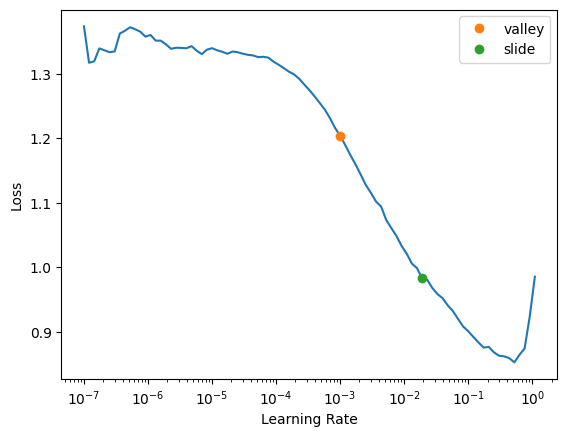

In [23]:
learn.lr_find(suggest_funcs=(valley, slide))

In [24]:
learn.fit_one_cycle(5,0.05 )

epoch,train_loss,valid_loss,accuracy,time
0,0.498015,0.492605,0.815853,00:10
1,0.489563,0.481564,0.819709,00:10
2,0.478278,0.455631,0.823629,00:10
3,0.476467,0.457180,0.824675,00:11
4,0.464796,0.445781,0.826505,00:10


In [25]:
test_df=pd.read_csv('/content/test.csv')

In [26]:
test_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [43]:
tst_dl = learn.dls.test_dl(test_df)

In [44]:
probs,_,idxs = learn.get_preds(dl=tst_dl, with_decoded=True)

In [45]:
idxs

tensor([0, 2, 2,  ..., 0, 0, 0])

In [46]:
dls.vocab

['Dropout', 'Enrolled', 'Graduate']

In [47]:
submission_df = pd.read_csv("sample_submission.csv")

In [48]:
submission_df.head()

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate


In [53]:

sub_csv = pd.DataFrame(test_df['id'])

In [54]:
sub_csv

,id
0,76518
1,76519
2,76520
3,76521
4,76522
...,...
51007,127525
51008,127526
51009,127527
51010,127528


In [55]:
sub_csv["Target"] = idxs

In [56]:
sub_csv

,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,1
4,76522,1
...,...,...
51007,127525,0
51008,127526,0
51009,127527,0
51010,127528,0


In [57]:
mapping = dict(enumerate(dls.vocab))

In [58]:
# Replace numbers with class labels using the map function
sub_csv['Target'] = sub_csv['Target'].map(mapping)

In [59]:
sub_csv

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [60]:
sub_csv.to_csv('output.csv', index=False)